# Mount google drive

# Please make sure you run this notebook in google colab only

Libraries used in this notebook with their versions are:

google	2.0.3

matplotlib	3.2.1

numpy	1.18.5

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Make imports for libraries necessary for convolution

In [0]:
import numpy as np
import cv2

In [0]:
file_path = '/content/drive/My Drive/Great Learning Codes/How convolution works/greatlearninglogo.jpeg'

Lets read the image into an array using cv2.imread function as a grayscale image

In [0]:
img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

Let's see how the original image looks like in grayscale

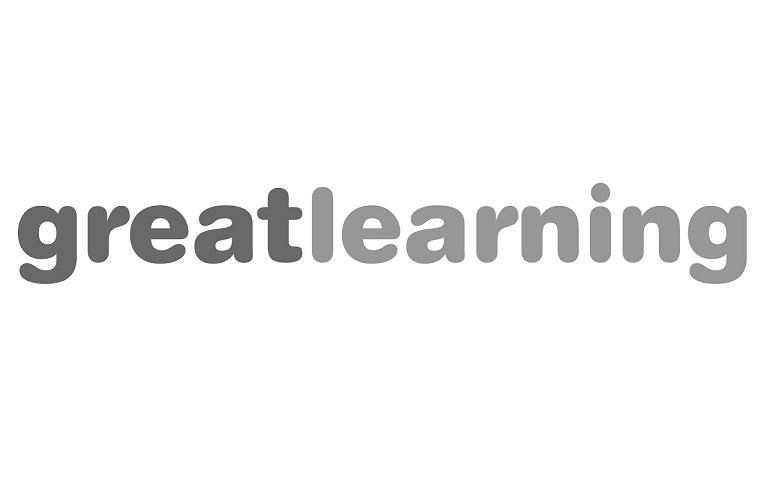

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

Let's resize the image to 256x256 for simplicity of a square image

In [0]:
img_resized = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA)

Let's create a copy of this resized image called img_aug. We will be saving the convoluted image to this variable

In [0]:
img_aug = img_resized.copy()
img_aug.shape

(256, 256)

Now let us see how the orignal image looks like

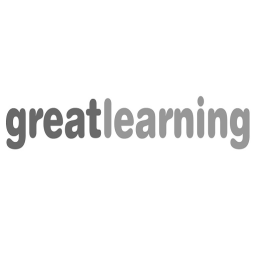

In [0]:
cv2_imshow(img_resized)

This is a list of popular edge filters. Try them all out and see the effect they have on the output convolved image. These are mainly edge detection filters. You can create your own filters as well.

In [0]:
# edge_filter =  np.array([ [-1, -2, -1], [0, 0, 0], [1, 2, 1]])     # sums to 0 high pass filter Sobel filtering
# edge_filter = np.array([ [0, -1, 0], [-1, 4, -1], [0, -1, 0]])       # sums to 0 
# edge_filter = np.array([ [0, -1, 0], [-1, 8, -1], [0, -1, 0]])       #sums > 0 can brighten the image
# edge_filter = np.array([ [0, -1, 0], [-1, -8, -1], [0, -1, 0]])       # sums < 0 can darken the image
# edge_filter = np.array([ [0, -1, 0], [-2, 6, -2], [0, -1, 0]])
# edge_filter = np.array([ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
# edge_filter = np.array([ [-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
# edge_filter = np.array([ [0.1, 0.2, 0.3], [0, 0, 0], [-0.1, -0.2, -0.3]])  #decimal filter

In [0]:
edge_filter.shape

(3, 3)

In [0]:
width = img_resized.shape[0]
height = img_resized.shape[1]

Let us perform the convolution operation. Here, we multiple each pixel of the 3x3 filter with a 3x3 slice of the entire image before moving on to the next 3x3 slice of the image. If the sum of the convolution exceeds 255 that is the highest value for a grayscale pixel, we clip it to 255 and if it is below 0, we clip it to 0

In [0]:
def convolute(edge_filter):
  for i in range(0,width-2):
    for j in range(0,height-2):
      conv_sum = 0
      conv_sum += img_resized[i,j] * edge_filter[0,0]
      conv_sum += img_resized[i+1,j] * edge_filter[1,0]
      conv_sum += img_resized[i+2,j] * edge_filter[2,0]
      conv_sum += img_resized[i,j+1] * edge_filter[0,1]
      conv_sum += img_resized[i+1,j+1] * edge_filter[1,1]
      conv_sum += img_resized[i+2,j+1] * edge_filter[2,1]
      conv_sum += img_resized[i,j+2] * edge_filter[0,2]
      conv_sum += img_resized[i+1,j+2] * edge_filter[1,2]
      conv_sum += img_resized[i+2,j+2] * edge_filter[2,2]
      if conv_sum < 0:
        conv_sum = 0
      elif conv_sum > 255:
        conv_sum = 255
      img_aug[i,j] = conv_sum
  return img_aug


This is a visualization of what exactly is happening

In [118]:
from IPython.display import Image
Image(url='https://media.giphy.com/media/i4NjAwytgIRDW/giphy.gif')

# This is how our final convolved image looks like for different edge filters

I have tried out for 3 filters from the list of filters commented earlier. You can try the others for yourself

In [0]:
edge_filter =  np.array([ [-1, -2, -1], [0, 0, 0], [1, 2, 1]])     # sums to 0 high pass filter Sobel filtering
img_conv = convolute(edge_filter)

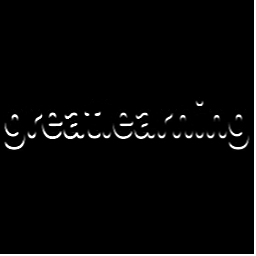

In [122]:
cv2_imshow(img_conv)

In [0]:
edge_filter = np.array([ [0, -1, 0], [-2, 6, -2], [0, -1, 0]])
img_conv = convolute(edge_filter)

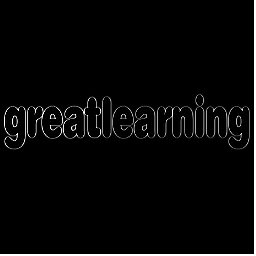

In [124]:
cv2_imshow(img_conv)

In [0]:
edge_filter = np.array([ [0.1, 0.2, 0.3], [0, 0, 0], [-0.1, -0.2, -0.3]])  #decimal filter
img_conv = convolute(edge_filter)

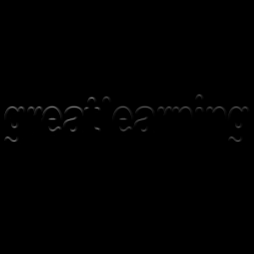

In [126]:
cv2_imshow(img_conv)

# Try for other filters and also create your own filters